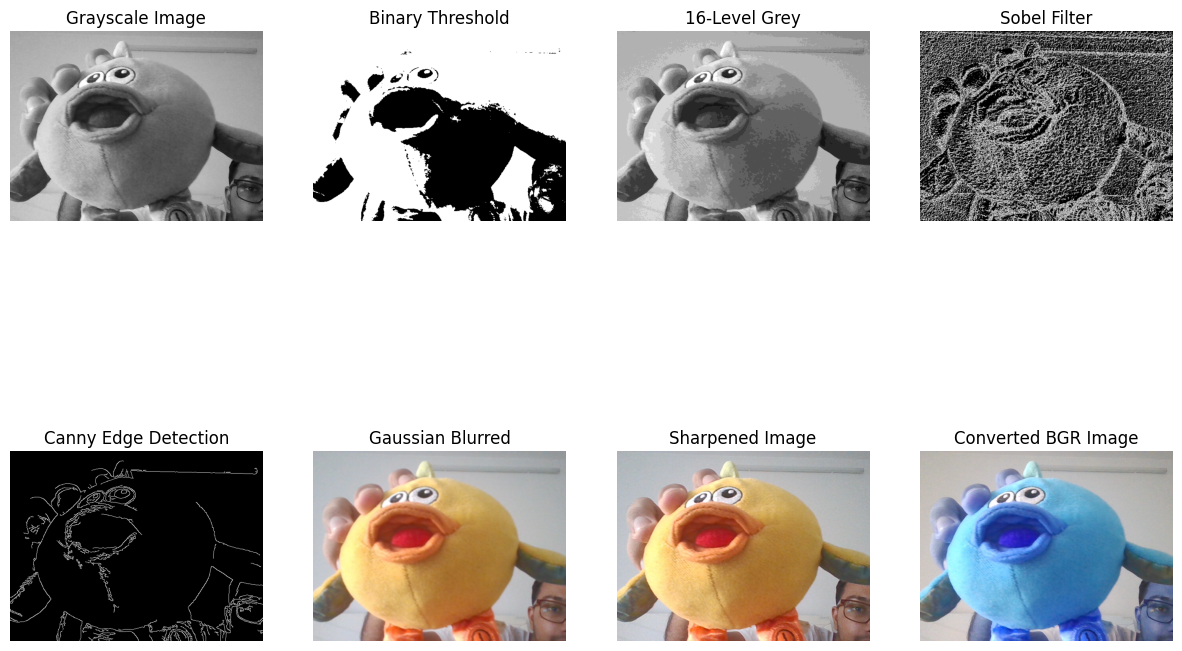

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image,ImageFilter, ImageOps

def show(name, n, m, i, Title):
    plt.subplot(n, m, i)
    plt.imshow(name,cmap='gray')  
    plt.title(Title)
    plt.axis("off")

def capture_image():
    cap = cv2.VideoCapture(0)  
    ret, frame = cap.read()
    cap.release()
    if ret:
        return cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  
    else:
        raise ValueError("Could not capture image. Check your camera.")

def grayscale(image):
    gray = np.mean(image, axis=2)
    return gray.astype(np.uint8)

def reduce_grey_levels(image, levels=2):
    step = 256 // levels
    reduced = (image // step) * step
    return reduced.astype(np.uint8)

def sobel_filter(image):
    pil_image = Image.fromarray(image)
    sobel_x = pil_image.filter(ImageFilter.Kernel((3, 3), [-1, 0, 1, -2, 0, 2, -1, 0, 1]))
    sobel_y = pil_image.filter(ImageFilter.Kernel((3, 3), [-1, -2, -1, 0, 0, 0, 1, 2, 1]))
    sobel = np.sqrt(np.array(sobel_x, dtype=np.float32)**2 + np.array(sobel_y, dtype=np.float32)**2)
    return np.clip(sobel, 0, 255).astype(np.uint8)

def canny_edge(image, lower=50, upper=150):
    return cv2.Canny(image, lower, upper)

def gaussian_blur(image, kernel_size=5):
    pil_image = Image.fromarray(image)
    blurred = pil_image.filter(ImageFilter.GaussianBlur(radius=kernel_size // 2))
    return np.array(blurred)

def sharpen_image(image):
    pil_image = Image.fromarray(image)
    sharpened = pil_image.filter(ImageFilter.SHARPEN)
    return np.array(sharpened)

def rgb_to_bgr(image):
    bgr_image = image.copy()  
    bgr_image[:, :, 0], bgr_image[:, :, 2] = image[:, :, 2], image[:, :, 0]
    return bgr_image

def main():
    original = capture_image()
    gray = grayscale(original)
    binary = reduce_grey_levels(gray)
    reduced_gray = reduce_grey_levels(gray,16)
    sobel = sobel_filter(gray)
    canny = canny_edge(gray)
    blurred = gaussian_blur(original)
    sharpened = sharpen_image(blurred)
    bgr_image = rgb_to_bgr(original)

    plt.figure(figsize=(15, 10))
    show(gray, 2, 4, 1, "Grayscale Image")
    show(binary, 2, 4, 2, "Binary Threshold")
    show(reduced_gray, 2, 4, 3, "16-Level Grey")
    show(sobel, 2, 4, 4, "Sobel Filter")
    show(canny, 2, 4, 5, "Canny Edge Detection")
    show(blurred, 2, 4, 6, "Gaussian Blurred")
    show(sharpened, 2, 4, 7, "Sharpened Image")
    show(bgr_image, 2, 4, 8, "Converted BGR Image")
    plt.show()

if __name__=='__main__':
    main()
